In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
%matplotlib inline

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/Machine_Learning_Foundation_Projects/main/existing_base_train.csv')
df_train.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [3]:
df_test=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/Machine_Learning_Foundation_Projects/main/existing_base_test.csv')
df_test

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,...,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,...,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,...,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,...,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,...,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,4952,Zero,41-45,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,0.00,Male,North West,6.80,1.66,7.33,17.16
2027,7348,Zero,65-70,Divorced/Separated,Retired,Unknown,Own Home,"<10,000, >= 8,000",No,No,...,265.80,11.48,27.96,68.92,Female,North West,21.29,74.59,64.86,170.49
2028,3903,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,"<25,000, >=22,500",No,Yes,...,39.98,46.43,8.98,27.93,Female,South West,26.19,32.20,33.80,103.54
2029,4767,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,0.00,0.00,1407.45,Female,East Anglia,0.00,234.58,0.00,224.67


In [4]:
x=df_train.corr()
x

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,1.000000,0.026152,-0.003218,-0.006604,0.003851,0.010882,0.019814,-0.003665,-0.008298,-0.003864,0.006365,-0.016627,0.004514,0.005642,-0.004075,0.002685,0.002762,-0.019852
year_last_moved,0.026152,1.000000,0.014315,0.013267,0.006197,0.010292,0.012969,0.007945,0.017261,0.000847,0.013398,0.006490,0.010721,0.016565,0.016056,0.014580,0.017924,-0.019630
Average_Credit_Card_Transaction,-0.003218,0.014315,1.000000,0.122762,0.317612,0.142606,0.416773,0.178150,0.089357,0.147438,0.131641,0.103417,0.135466,0.494653,0.208564,0.227267,0.334657,-0.260559
Balance_Transfer,-0.006604,0.013267,0.122762,1.000000,0.225434,0.579267,0.162104,0.364480,0.390466,0.476061,0.152481,0.155322,0.103240,0.745051,0.482565,0.603648,0.655522,-0.068647
Term_Deposit,0.003851,0.006197,0.317612,0.225434,1.000000,0.277802,0.509060,0.274553,0.141514,0.200841,0.181591,0.179143,0.102339,0.617357,0.263169,0.348750,0.451947,-0.017412
Life_Insurance,0.010882,0.010292,0.142606,0.579267,0.277802,1.000000,0.231832,0.507877,0.411186,0.557926,0.257747,0.281339,0.117841,0.806732,0.572773,0.845890,0.792836,-0.201998
Medical_Insurance,0.019814,0.012969,0.416773,0.162104,0.509060,0.231832,1.000000,0.266829,0.101725,0.202282,0.215206,0.144905,0.149324,0.545814,0.267200,0.382948,0.433584,-0.102217
Average_A/C_Balance,-0.003665,0.007945,0.178150,0.364480,0.274553,0.507877,0.266829,1.000000,0.193468,0.437742,0.302556,0.377556,0.160302,0.517854,0.580203,0.637153,0.599855,-0.114258
Personal_Loan,-0.008298,0.017261,0.089357,0.390466,0.141514,0.411186,0.101725,0.193468,1.000000,0.424295,0.224014,0.125360,0.079820,0.403742,0.685400,0.703672,0.618259,0.022841
Investment_in_Mutual_Fund,-0.003864,0.000847,0.147438,0.476061,0.200841,0.557926,0.202282,0.437742,0.424295,1.000000,0.253396,0.254454,0.091961,0.546054,0.695245,0.774477,0.704382,-0.110020


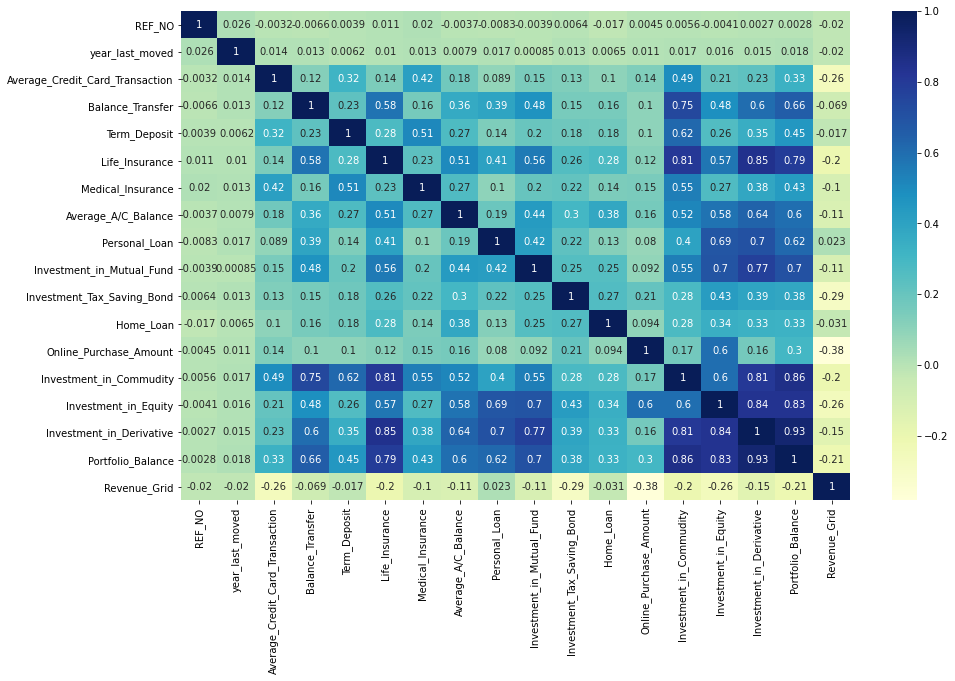

In [5]:
plt.subplots(figsize=(15,9))
sns.heatmap(x, annot=True, cmap='YlGnBu',linecolor ='black')

## Preparing X and y 

In [6]:
df_train.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [7]:
df_train.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [8]:
feature_cols=['age_band', 'status', 'occupation', 'occupation_partner', 'home_status',
       'family_income', 'self_employed', 'self_employed_partner',
       'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance']
X=df_train[feature_cols]

In [9]:
X.head()

,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,Average_Credit_Card_Transaction,Balance_Transfer,...,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,26.98,29.99,...,175.43,134.35,8.98,55.44,7.68,Female,151.55,81.79,136.02,360.37
1,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,35.98,74.48,...,15.99,0.00,0.00,0.00,18.99,Female,44.28,13.91,29.23,89.22
2,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,0.00,24.46,...,0.02,10.46,0.00,0.00,0.00,Female,8.58,1.75,4.82,14.50
3,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,44.99,0.00,...,0.00,0.00,0.00,0.00,0.00,Female,15.00,0.00,5.00,68.98
4,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,0.00,0.00,...,0.00,9.98,0.00,0.00,0.00,Female,0.00,1.66,1.66,1.88


In [10]:
X.columns

Index(['age_band', 'status', 'occupation', 'occupation_partner', 'home_status',
       'family_income', 'self_employed', 'self_employed_partner',
       'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance'],
      dtype='object')

In [11]:
X.shape

(8124, 24)

In [12]:
y=df_train['Revenue_Grid']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Revenue_Grid, dtype: int64

In [13]:
y.shape

(8124,)

## Splitting Train and Test Dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.head()

,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,Average_Credit_Card_Transaction,Balance_Transfer,...,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
7434,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,19.49,0.00,...,0.0,27.47,4.49,0.00,0.0,Female,13.39,6.08,13.99,69.13
7725,51-55,Partner,Housewife,Manual Worker,Own Home,"<17,500, >=15,000",No,Yes,0.00,0.00,...,0.0,26.98,0.00,0.00,0.0,Female,4.50,4.50,8.25,3.06
783,45-50,Partner,Housewife,Manual Worker,Own Home,"<27,500, >=25,000",No,No,0.00,40.48,...,0.0,18.96,0.50,36.44,0.0,Female,30.48,13.56,26.14,35.78
1928,55-60,Widowed,Other,Unknown,Rent from Council/HA,"< 8,000, >= 4,000",No,No,117.40,1.03,...,0.0,37.45,29.49,5.72,0.0,Female,155.58,23.36,84.76,285.73
7466,65-70,Partner,Retired,Retired,Own Home,"<15,000, >=12,500",No,No,0.00,99.99,...,0.0,33.97,0.00,0.00,0.0,Female,24.80,11.91,15.91,20.84


In [17]:
X_train.describe()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
count,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,23.154630,45.968684,27.124904,64.756261,18.748989,31.499286,25.044371,41.392131,6.021556,4.454762,18.417260,35.950896,21.138989,31.244625,88.216332
std,51.623293,80.389950,53.573599,96.229301,32.212910,44.717619,87.790841,65.727555,12.638965,10.104307,94.878379,42.628808,32.910506,40.252508,109.604153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.190000,4.665000,8.695000,25.980000
50%,0.000000,17.490000,0.000000,30.000000,0.000000,14.970000,0.000000,23.480000,0.000000,0.000000,0.000000,23.580000,12.820000,21.160000,65.610000
75%,21.980000,64.970000,34.970000,92.435000,26.480000,45.475000,20.480000,58.950000,5.490000,4.490000,6.490000,49.675000,27.510000,41.965000,121.985000
max,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.930000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000


In [18]:
X_test.head()

,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,Average_Credit_Card_Transaction,Balance_Transfer,...,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
380,31-35,Partner,Business Manager,Business Manager,Own Home,">=35,000",No,No,24.99,0.00,...,34.97,0.00,19.48,14.99,0.00,Female,38.39,30.06,43.73,101.58
3641,22-25,Divorced/Separated,Professional,Unknown,Own Home,"<25,000, >=22,500",No,No,0.00,174.41,...,4.49,170.82,19.99,2.99,247.91,Female,81.44,83.52,73.00,298.41
273,41-45,Partner,Secretarial/Admin,Unknown,Own Home,"<27,500, >=25,000",No,Yes,0.00,32.18,...,162.18,83.18,53.95,16.47,378.22,Female,37.37,129.05,87.47,193.85
1029,41-45,Partner,Unknown,Professional,Own Home,">=35,000",Yes,Yes,0.00,1.03,...,0.00,25.98,0.00,6.98,0.00,Female,26.30,7.24,22.82,100.12
684,36-40,Partner,Professional,Professional,Own Home,"<27,500, >=25,000",No,No,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,Female,4.60,0.00,3.83,-15.08


In [19]:
X_test.describe()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,23.636892,46.539803,27.923532,67.564308,19.134972,33.192763,26.901434,43.049409,6.199988,4.265545,22.323772,36.960037,22.656234,32.674585,93.900812
std,49.212180,73.655281,56.329790,93.867707,31.256352,47.306671,73.538565,58.879715,12.812991,9.285993,81.370069,41.857221,29.502778,36.218810,102.844583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-76.350000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000,4.660000,8.830000,27.270000
50%,0.000000,15.980000,0.000000,33.980000,4.990000,14.990000,0.000000,23.980000,0.000000,0.000000,0.000000,23.790000,12.990000,20.890000,65.390000
75%,24.990000,67.470000,34.470000,95.470000,28.460000,46.920000,21.480000,61.940000,5.980000,4.490000,10.980000,50.580000,30.040000,45.460000,130.740000
max,477.820000,749.380000,738.670000,799.120000,235.360000,402.600000,1280.200000,522.580000,121.440000,78.880000,1652.450000,412.960000,292.400000,389.410000,952.490000


In [20]:
y_train.head()

7434    2
7725    2
783     2
1928    2
7466    2
Name: Revenue_Grid, dtype: int64

In [21]:
y_train.describe()

count    6499.000000
mean        1.896599
std         0.304505
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Revenue_Grid, dtype: float64

In [22]:
y_test.head()

380     2
3641    1
273     1
1029    2
684     2
Name: Revenue_Grid, dtype: int64

In [23]:
y_test.describe()

count    1625.000000
mean        1.884308
std         0.319954
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Revenue_Grid, dtype: float64

### As this is classification problem, using Logistic Regression Algorithm

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [26]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)

In [28]:
from sklearn.linear_model import LogisticRegression

# Create an object of LinearRegression()
clf = LogisticRegression()

# Study on (QB, AB) i.e. fit()
clf.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression() 
clf.fit(X_train, y_train) 


LogisticRegression()

In [30]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [31]:
y_pred_train = clf.predict(X_train)  

In [32]:
y_pred_test = clf.predict(X_test) 

### Accuracy score

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9409158050221565


### Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

     0     1
0  148    79
1   41  1763


In [35]:
confusion_matrix.index=['Actual_Average_Credit_Card_Transaction', 'Actual_Average_A/C_Balance']
print(confusion_matrix)

                                          0     1
Actual_Average_Credit_Card_Transaction  148    79
Actual_Average_A/C_Balance               41  1763


#  Score Calculation

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score


#### Precision =True Positives / (True Positives + False Positives)

**Precision =148 / (148 + 41)**

**=148 / 189**

**=0.78**

In [37]:
precision_score(y_test, y_pred_test)

0.783068783068783

### Recall for Multi-Class Classification 

### Recall = (TruePositives_1 + TruePositives_2) / ((TruePositives_1 + TruePositives_2) + (FalsePositives_1 + FalsePositives_2) )

**Recall = (148+79)/((148+79)+(41+79)**
**= 227 /347**
**=0.65**

In [38]:
recall_score(y_test, y_pred_test)

0.6519823788546255

### F-Score = (2 * Precision * Recall) / (Precision + Recall)

**F1-score =(2 * 0.783 * 0.651) / (0.783+0.651)**

**=1.019 / 1.43**

**=0.71**

In [39]:
f1_score(y_test, y_pred_test)

0.7115384615384615

In [41]:
output = pd.DataFrame({'REF_NO': df_test.index,'Revenue_Grid': y_pred_test})
output.to_csv('customer-classification-submission.csv', index=False, header=False)